<a href="https://colab.research.google.com/github/AldoVictorUliczki/UPSO-ELEMENTOS-DE-APRENDIZAJE-DE-M-QUINA-Y-BIG-DATA/blob/main/AldoUliczki_Laboratorio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Laboratorio 3: Clasificador zonas según el peligro


###Integrante: Aldo Victor Uliczki
###Fecha de entrega:
###Miércoles, 20 de noviembre, 23:00 hs

###Introducción:
###Se debe desarrollar un programa que permita clasificar los estados en diferentes categorías, dividiéndolos en zonas de baja peligrosidad y alta peligrosidad.

##Paso 0: Importar librerias y Cargar los datasets a Google Drive

In [286]:
# Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MeanShift, DBSCAN
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

In [287]:
# Para leer los datasets de Google Drive
from google.colab import drive
drive.mount("drive",force_remount=True)

Mounted at drive


In [288]:
# Path del carpeta donde tenemos los datasets
mi_ruta = "/content/drive/MyDrive/Colab Notebooks/Elementos de Aprendizaje de Máquina y Big Data/Laboratorio3/Crimenes.csv"

In [289]:
# leemos el dataset y creamos una copia para trabajar
df = pd.read_csv(mi_ruta)
df_crimen = df.copy()
df_crimen.head(1)

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2


##Configuacion de los datos

In [290]:
# Revisamos si hay campos NaN en el dataframe
# Devuelve True si hay valores NaN en el dataframe
respuesta = df_crimen.isnull().values.any()
respuesta

False

In [291]:
#revisamos las caracteristicas del dataset
print("Forma del dataset:")
print(df_crimen.shape)

muestra, caracteristicas = df_crimen.shape

print("Muestras del dataset:")
print(muestra)
print("Caracteristicas del dataset:")
print(caracteristicas)

Forma del dataset:
(50, 5)
Muestras del dataset:
50
Caracteristicas del dataset:
5


###Realizamos un grafico de dispersion para obtener una representacion visual de como se relacionan los Asesinatos, Asaltos y Violaciones respecto a la cantidad de Poblacion Urbana del dataset.

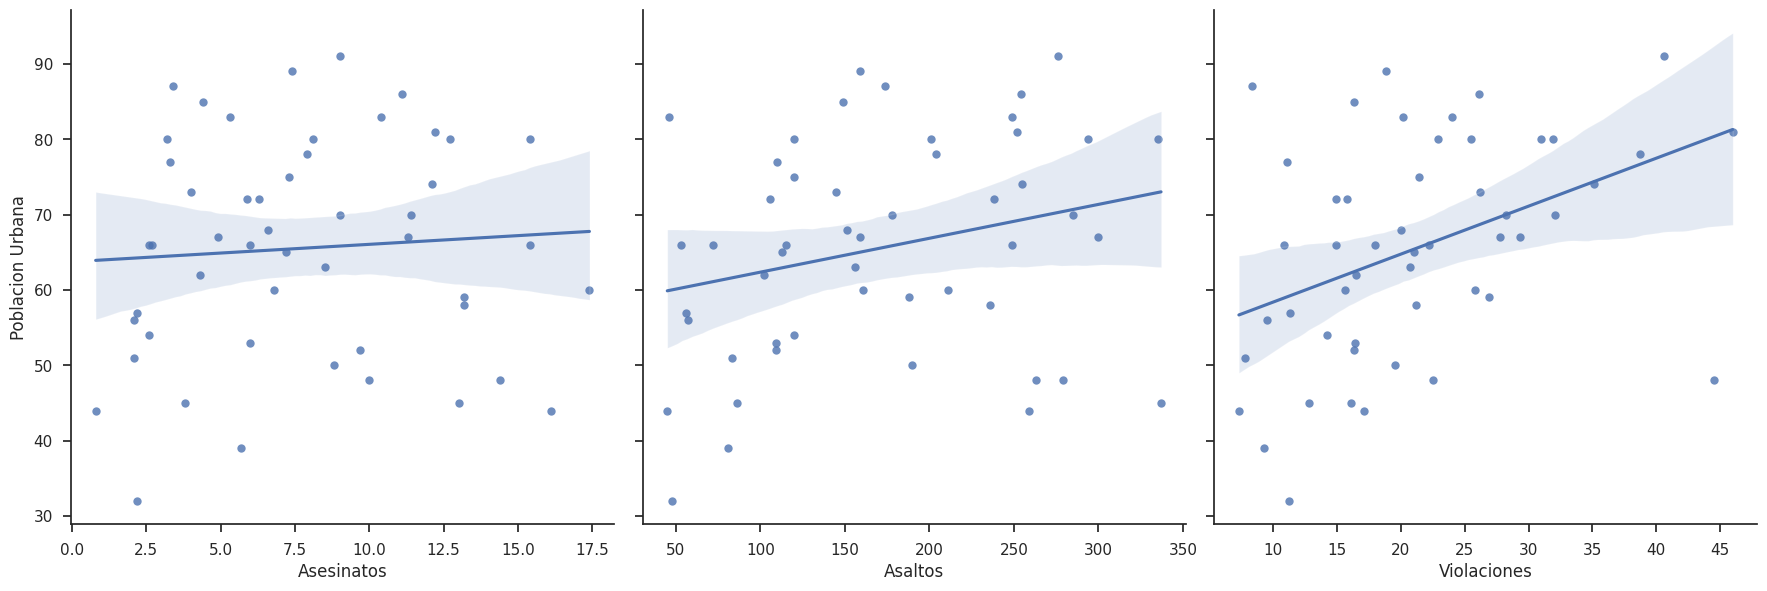

In [292]:
%matplotlib inline
sns.set(style="ticks", color_codes=True)

sns.pairplot(df_crimen, x_vars=['Asesinatos','Asaltos','Violaciones'], y_vars='Poblacion Urbana',  height=6, aspect=1., kind='reg')

###Se puede observar como las Violaciones presentan una mayor tendencia a aumentar a medida que aumenta la Poblacion Urbana.*texto en cursiva*

##Aplicando KMeans

###Para determinar el numero de clusters a utilizar realizaremos el grafico del codo utilizando el algoritmo de KMeans y aplicando KElbowVisualizer, que nos ayudara a determinar el numero optimo para este conjunto de datos.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

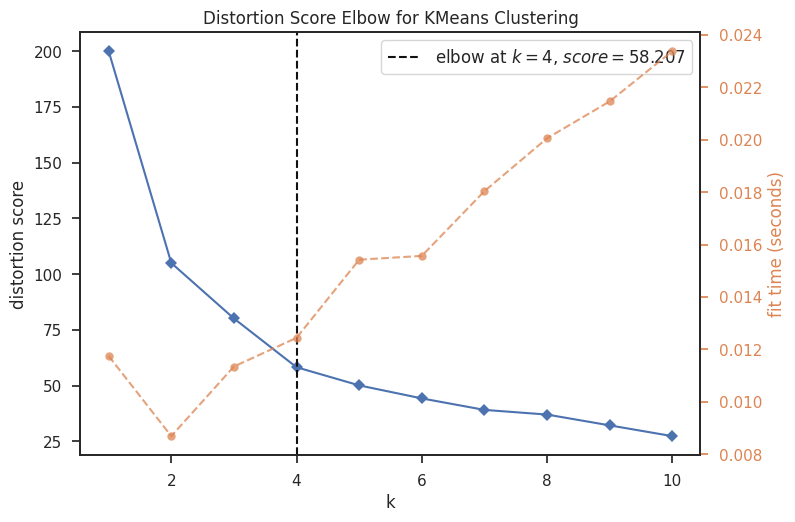

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [293]:
# Seleccionar las características relevantes, omitimos el nombre de los estados para evitar errores
features = ['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']
data = df_crimen[features]

# Escalar los datos para que todas las características tengan la misma importancia
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Visualización del codo para determinar el número óptimo de centroides
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))

#Entrenamos y visualizamos
visualizer.fit(data_scaled)
visualizer.show()

###Se puede observar que el valor optimo de clusters es 4, de forma que ese sera el valor que utilizaremos.
``
``

###Como el laboratorio requiere que se clasifique en Mas Peligroso y Menos Peligroso pero tenemos 4 clusters, la forma que usaremos sera:

###Peligrosidad Alta


###Peligrosidad Moderada


###Peligrosidad Media


###Peligrosidad Baja

In [294]:
#definimos el numero optimo de cluster
cluster_optimo = 4

###Usamos KMeans con los clusters optimos para generar el conjunto de datos y procedemos a visualizarlo como un grafico de dispersion.

<ipython-input-295-60fb3314be13>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:, 0], data[:, 1], s=100, cmap='viridis')


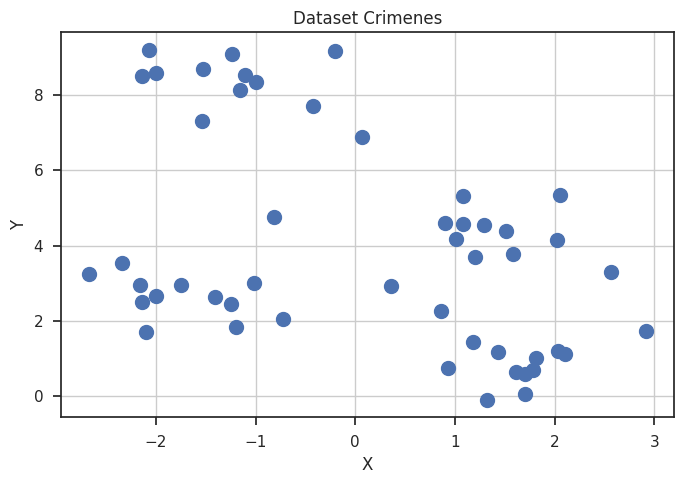

In [295]:
data, labels = make_blobs(muestra, centers=cluster_optimo, cluster_std=0.7, random_state=0)

plt.figure(figsize=(7, 5))

plt.scatter(data[:, 0], data[:, 1], s=100, cmap='viridis')
plt.title('Dataset Crimenes')
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)

plt.tight_layout()
plt.show()

###Aplicamos el algoritmo de KMeans para agrupar los datos y mostramos el centroide de cada cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


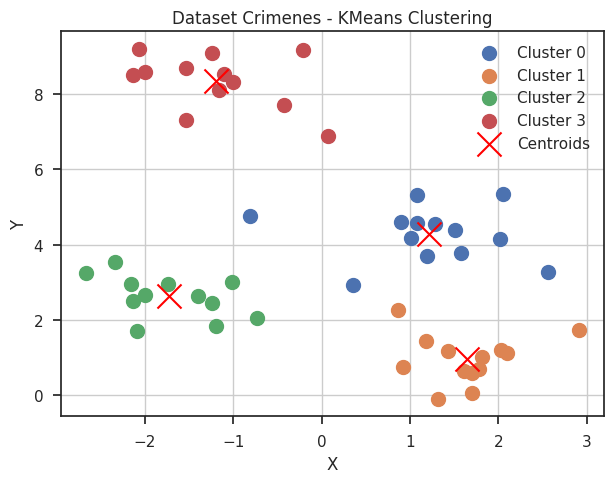

In [302]:
kmeans = KMeans(n_clusters=cluster_optimo, random_state=42)
clusters = kmeans.fit_predict(data)


plt.figure(figsize=(7, 5))
for cluster_num in set(labels):
    plt.scatter(data[labels == cluster_num, 0], data[labels == cluster_num, 1], label=f'Cluster {cluster_num}', s=100)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x', label="Centroids")
plt.title('Dataset Crimenes - KMeans Clustering')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)

plt.show()

###Creamos la columna 'Cluster' en el dataframe y le asignamos el valor obtenido por el modelo y realizamos graficos de cajas para ver como actuan las diferentes caracteristicas frente los clusters obtenidos.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


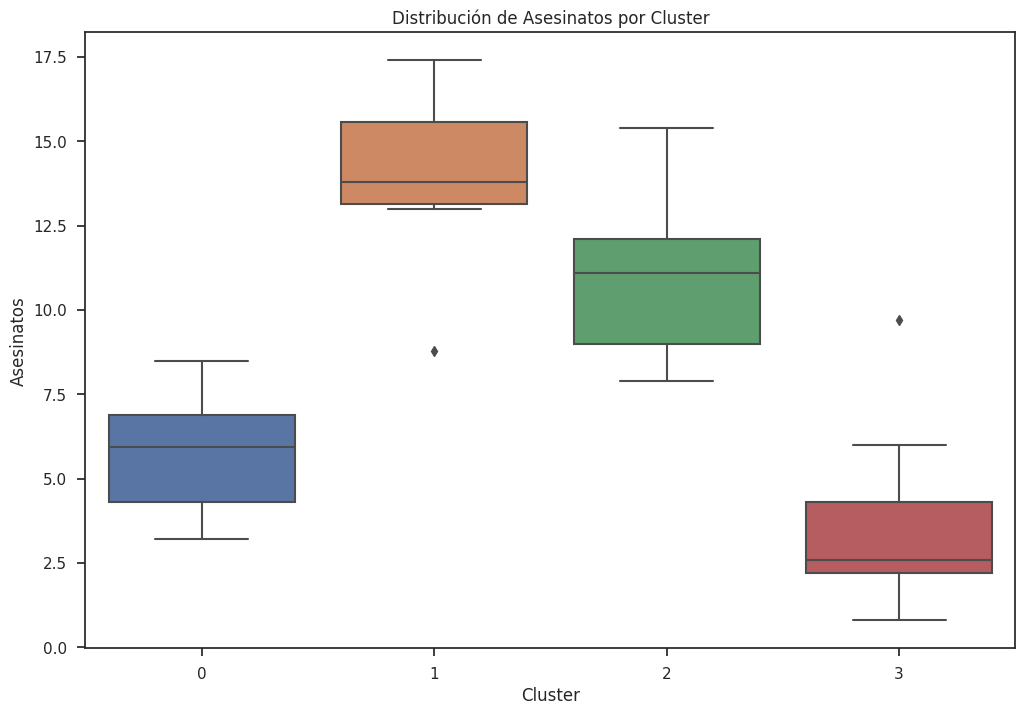

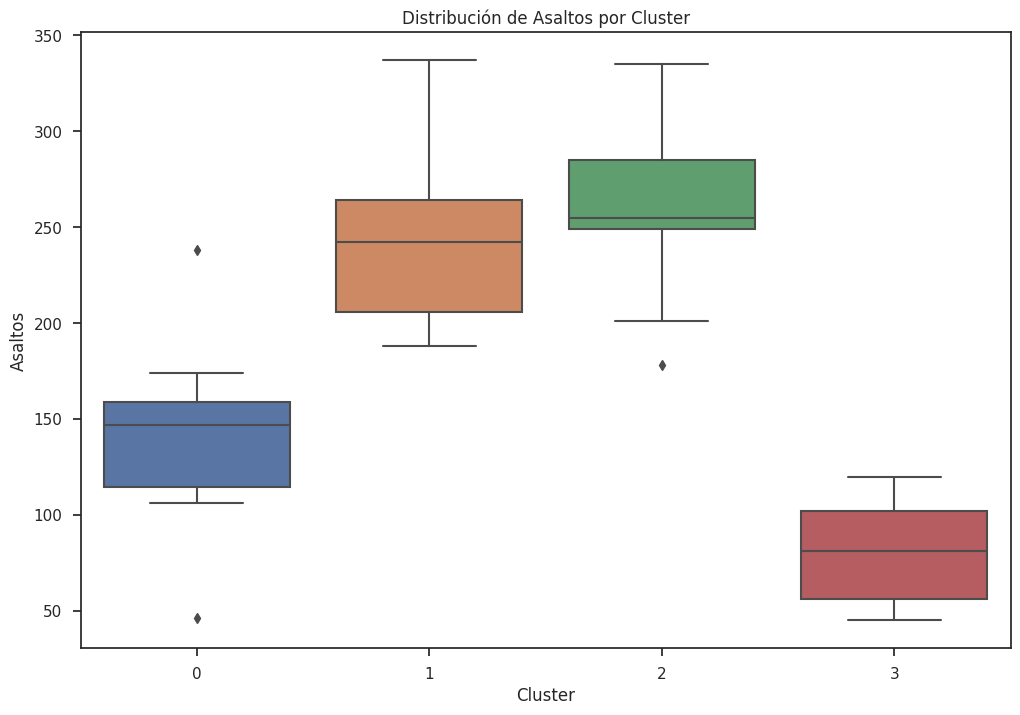

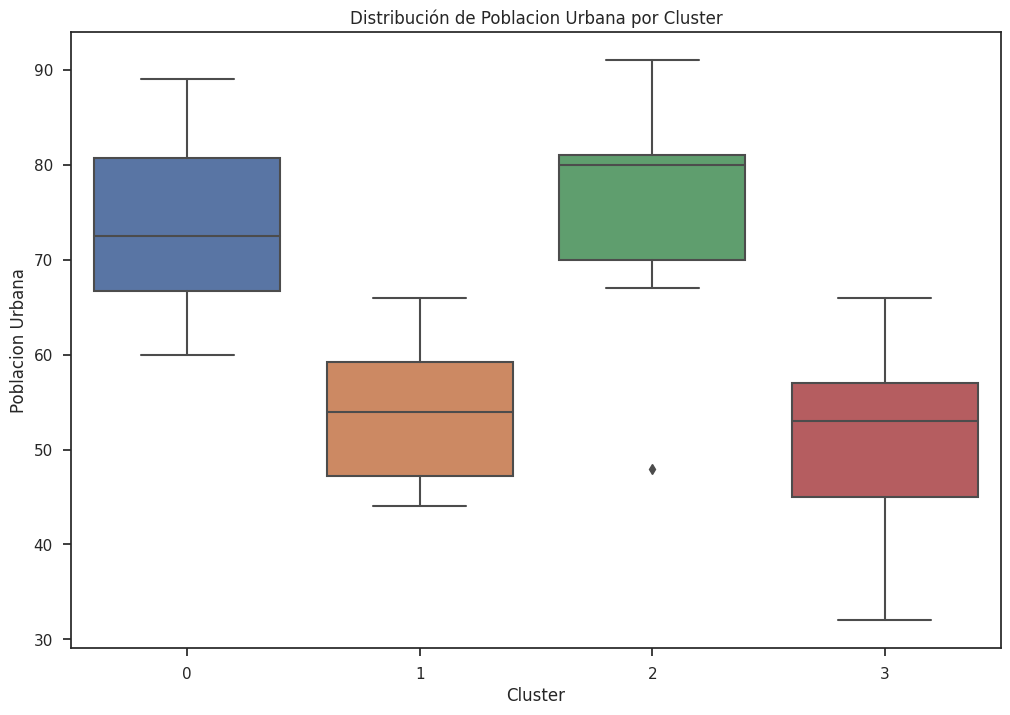

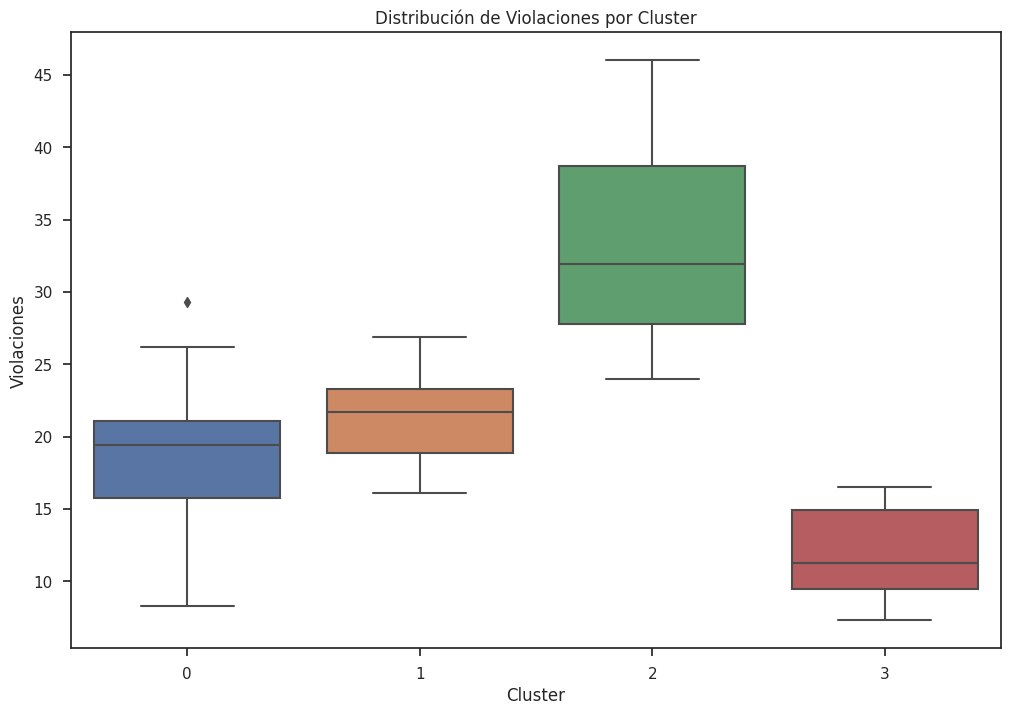

In [297]:
df_crimen['Cluster'] = kmeans.fit_predict(data_scaled)

for feature in features:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Cluster', y=feature, data=df_crimen)
    plt.title(f'Distribución de {feature} por Cluster')
    plt.show()


###Luego de revisar los graficos observamos lo siguiente(de mayor a menor):


###Distribucion por Asesinatos: [  1 | 2 | 0 | 3  ]

###Distribucion por Asaltos: [  2 | 1 | 0 | 3  ]

###Distribucion por Poblacion Urbana: [  2 | 0 | 1 | 3]

###Distribucion por Violaciones: [  2 | 1 | 0 | 3]
``
``
###Podemos decir que en base a los resultados:

###0  =  Peligrosidad Media

###1  =  Peligrosidad Moderada

###2  =  Peligrosidad Alta

###3  =  Peligrosidad Baja

###Agregamos una nueva columna al dataset que tome el valor del cluster y en base al mismo complete su celda con el texto correspondiente a su peligrosidad.

In [298]:
df_crimen['Nivel de Peligrosidad'] = df_crimen['Cluster'].map(
    {0: 'Peligrosidad Media', 1: 'Peligrosidad Moderada', 2: 'Peligrosidad Alta', 3: 'Peligrosidad Baja'})

# Mostrar el DataFrame con la nueva columna
df_crimen

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Cluster,Nivel de Peligrosidad
0,Alabama,13.2,236,58,21.2,1,Peligrosidad Moderada
1,Alaska,10.0,263,48,44.5,2,Peligrosidad Alta
2,Arizona,8.1,294,80,31.0,2,Peligrosidad Alta
3,Arkansas,8.8,190,50,19.5,1,Peligrosidad Moderada
4,California,9.0,276,91,40.6,2,Peligrosidad Alta
5,Colorado,7.9,204,78,38.7,2,Peligrosidad Alta
6,Connecticut,3.3,110,77,11.1,0,Peligrosidad Media
7,Delaware,5.9,238,72,15.8,0,Peligrosidad Media
8,Florida,15.4,335,80,31.9,2,Peligrosidad Alta
9,Georgia,17.4,211,60,25.8,1,Peligrosidad Moderada


###Para concluir recorreremos el dataset agrupando los datos en base a su peligrosidad para mostrar cuanta cantidad de datos corresponde a cada cada categoria.

In [304]:
# Agrupar por Nivel de Peligrosidad y contar la cantidad de datos en cada grupo
agrupado = df_crimen.groupby('Nivel de Peligrosidad').size()

# Imprimir la cantidad de datos por cada nivel de peligrosidad
for nivel, cantidad in agrupado.items():
    print(f"{nivel} = {cantidad} datos")

Peligrosidad Alta = 13 datos
Peligrosidad Baja = 13 datos
Peligrosidad Media = 16 datos
Peligrosidad Moderada = 8 datos


In [305]:
#Recordadndo la clasificacion de datos:
#0: 'Peligrosidad Media'
#1: 'Peligrosidad Moderada'
#2: 'Peligrosidad Alta'
#3: 'Peligrosidad Baja'
agrupado = df_crimen.groupby('Cluster').size()
for nivel, cantidad in agrupado.items():
    print(f"{nivel} = {cantidad} datos")

0 = 16 datos
1 = 8 datos
2 = 13 datos
3 = 13 datos
